In [1]:
#!/usr/bin/env python3

import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

INPUT_PATH = '/home/vit/Projects/cryptobench/data/B-create-dataset/rigid-dataset-alternative-aware'
ALL_PAIRS_CSV_PATH = f'{INPUT_PATH}/filtered_rmsd.csv'


with open(f'{INPUT_PATH}/dataset.json') as f:
    dataset = json.load(f)

all_pairs = pd.read_csv(ALL_PAIRS_CSV_PATH)

# the number of alternative apo-holo pairs for each apo structure - min(len(apo_pairs), len(holo_pairs))
number_of_pairs = {}

for apo_pdb_id in dataset.keys():
    holo_structure = dataset[apo_pdb_id][0]
    apo_query_POI = f"{holo_structure['ligand_chain']}_{holo_structure['ligand']}_{holo_structure['ligand_index']}"

    out = all_pairs[(all_pairs['apo_query_POI'] == apo_query_POI) & (
        all_pairs['apo_structure'] == apo_pdb_id)].iloc[0]
    minimum = min(out['number_of_alternative_holos'],
                  out['number_of_alternative_apos'])
    # minimum = out['number_of_alternative_holos'] + out['number_of_alternative_apos']
    if minimum not in number_of_pairs:
        number_of_pairs[minimum] = 0
    number_of_pairs[minimum] += 1

sorted_values = []
for k in sorted(number_of_pairs.keys()):
    sorted_values.append(number_of_pairs[k])

cumulative = np.cumsum(sorted_values)


/tmp/ipykernel_5377/3649302616.py:15: DtypeWarning: Columns (31,71,84) have mixed types. Specify dtype option on import or set low_memory=False.
  all_pairs = pd.read_csv(ALL_PAIRS_CSV_PATH)


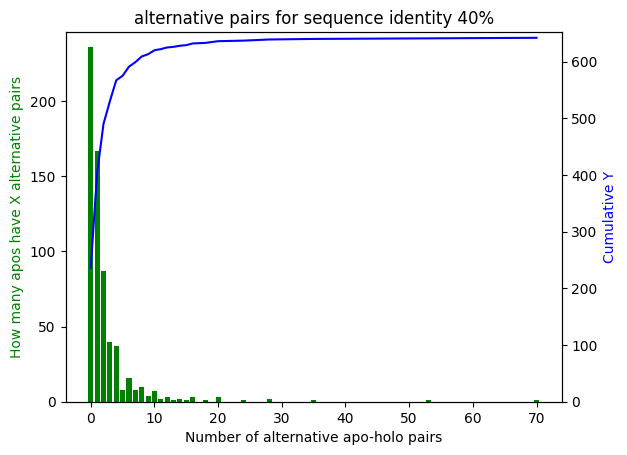

In [2]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(list(number_of_pairs.keys()), number_of_pairs.values(), color='g')
ax2.plot(list(sorted(number_of_pairs.keys())), cumulative, 'b-')

plt.title('alternative pairs for sequence identity 40%')
ax1.set_xlabel('Number of alternative apo-holo pairs')
ax1.set_ylabel('How many apos have X alternative pairs', color='g')
ax2.set_ylabel('Cumulative Y', color='b')
ax1.set_ylim([0, cumulative[0] + 10])
ax2.set_ylim([0, cumulative[-1] + 10])
plt.show()

In [18]:
cumulative[0]

263

In [ ]:
cumulative_normalized